In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv(r"C:\Users\hp\Documents\data science resources\car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [6]:
x=data['Year'].values.reshape(-1, 1)
y=data['Price']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train, y_train)

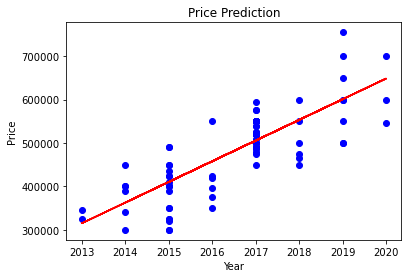

In [9]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [10]:
predictions=model.predict(x_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error=', mean_squared_error(y_test, predictions))
print('R2 Squared Value=', r2_score(y_test, predictions))

Mean Squared Error= 4326906256.829671
R2 Squared Value= 0.36759313425902185


In [12]:
value=model.predict([[2022]])
value

array([743601.61594504])

### Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

Lasso()

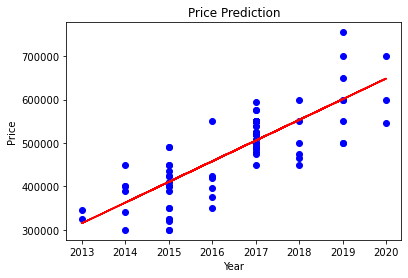

In [14]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, lasso_model.predict(x_train), color='red')
plt.title('Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [15]:
lasso_pred = lasso_model.predict(x_test)

In [16]:
print('Mean Squared Error=', mean_squared_error(y_test, lasso_pred))
print('R2 Squared Value=', r2_score(y_test, lasso_pred))

Mean Squared Error= 4326859771.015669
R2 Squared Value= 0.3675999284778446


In [17]:
value_lasso = lasso_model.predict([[2022]])
value_lasso

array([743599.37427144])

#### We are getting R2 squared value and Mean Square value same for Lasso and Linear Regression in this case. So both of them will be performing the same way.